<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#### Read the data

Load the csv file and print the first five observations.

In [73]:
data_diamond=pd.read_csv('diamond_data.csv')
data_diamond.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.300000,Good,F,61.100000,61.000000,682,4.290000,4.320000,2.630000
1,0.720000,Ideal,H,62.000000,56.000000,2443,5.800000,5.740000,3.580000
2,1.710000,Premium,J,62.900000,58.000000,8848,7.640000,7.580000,4.790000
3,1.010000,Premium,E,59.200000,59.000000,7287,6.670000,6.600000,3.930000
4,0.520000,Ideal,D,62.700000,56.000000,1720,5.170000,5.140000,3.230000


In [5]:
data_diamond.shape

(1547, 9)

In [6]:
data_diamond.dtypes

carat    float64
cut       object
color     object
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [7]:
data_diamond.describe()

,carat,depth,table,price,x,y,z
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,0.791325,61.762185,57.445184,3938.685844,5.713594,5.714460,3.528203
std,0.475814,1.439904,2.235772,4117.039798,1.126730,1.116477,0.693149
min,0.230000,54.600000,52.000000,327.000000,3.860000,3.880000,2.310000
25%,0.400000,61.100000,56.000000,918.000000,4.705000,4.720000,2.910000
50%,0.700000,61.900000,57.000000,2301.000000,5.640000,5.660000,3.500000
75%,1.035000,62.500000,59.000000,5188.000000,6.535000,6.520000,4.030000
max,2.660000,71.800000,70.000000,18803.000000,9.080000,9.010000,5.540000


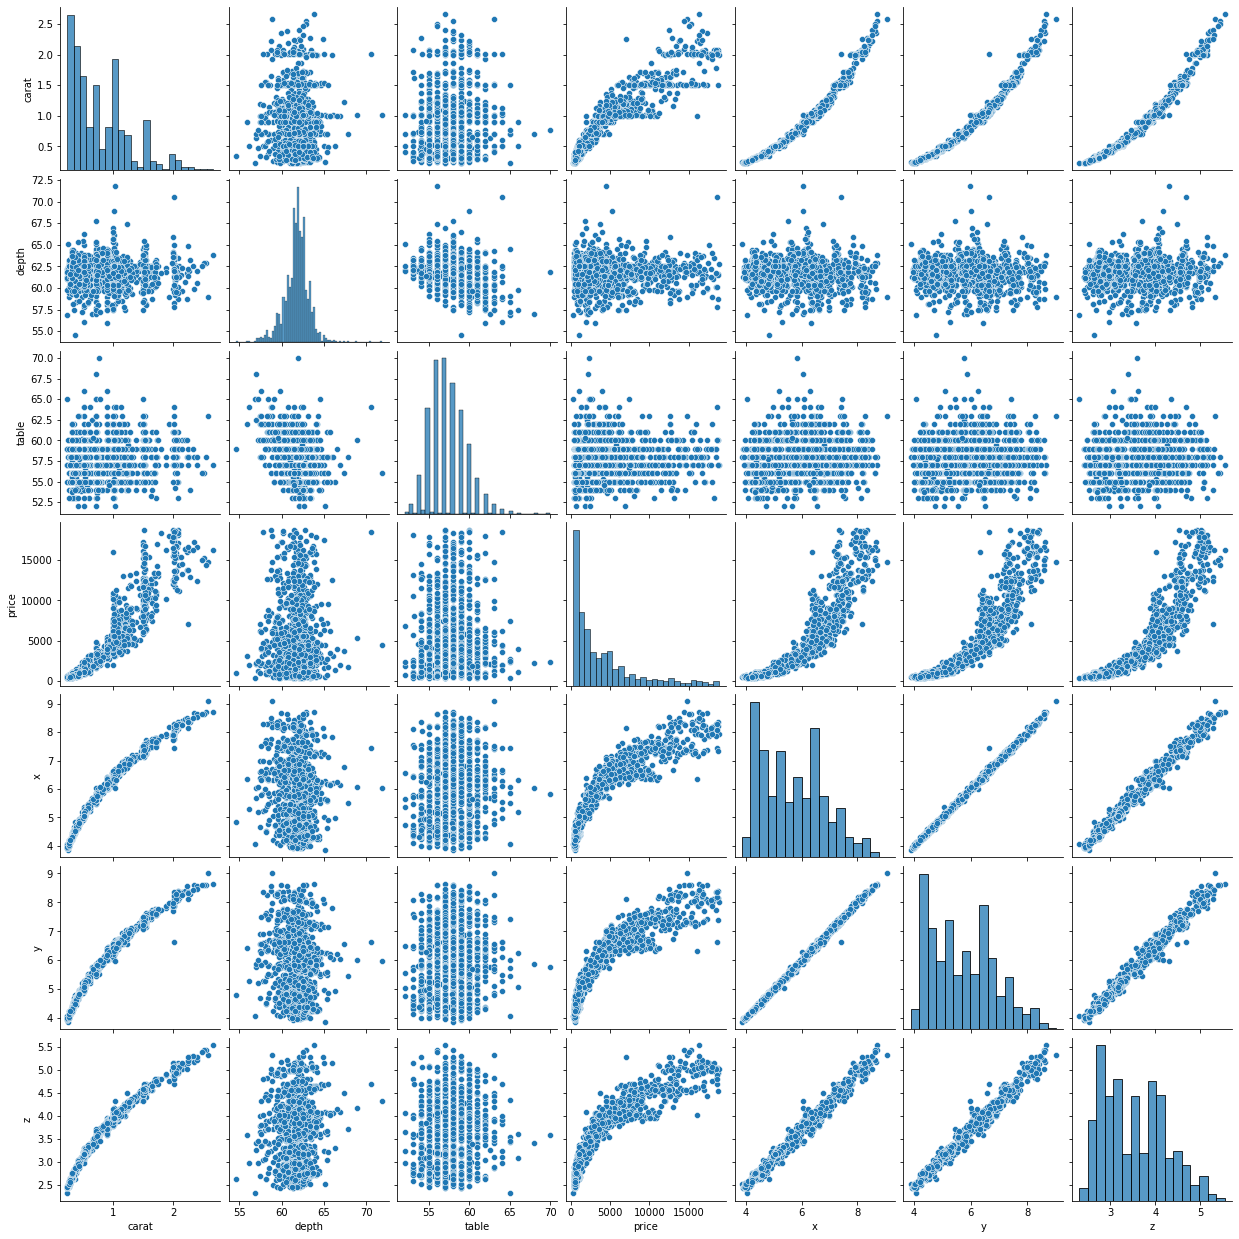

In [8]:
sns.pairplot(data_diamond)

Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='y', ylabel='Density'>

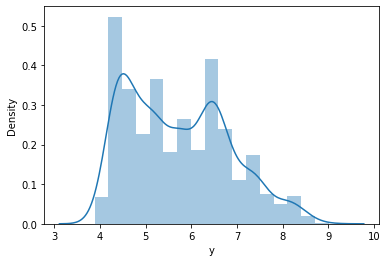

In [9]:
sns.distplot(data_diamond['y'])

In [23]:
width=np.log(data_diamond['y'])

In [24]:
width.skew()

0.15322643692701352

<AxesSubplot:xlabel='y', ylabel='Density'>

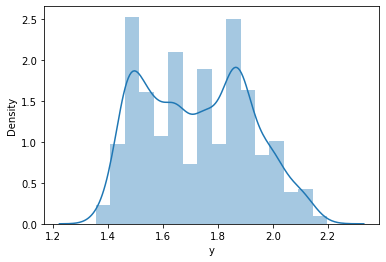

In [25]:
sns.distplot(width)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
data_diamond=pd.get_dummies(data_diamond,columns=['cut','color'],drop_first=True,)

In [28]:
x=data_diamond.drop('price',axis=1)
y=data_diamond['price']
x=sm.add_constant(x)
model_diamond=sm.OLS(y,x).fit()
model_diamond.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:41:36   Log-Likelihood:                -13345.
No. Observations:                1547   AIC:                         2.672e+04
Df Residuals:                    1530   BIC:                         2.681e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.066e+04   8378.089     -1.272      0.204   -2.71e+04    5776.269
carat          1.322e+04    371.464     35.601      0.000    1.25e+04     1.4e+04
depth           273.9828    131.712      2.080      0.038      15.627     532.338
table           -30.3427     20.547     -1.477      0.140     -70.646       9.961
x             -1692.0142    899.352     -1.881      0.060   -3456.108      72.080
y              3092.6570   1044.380      2.961      0.003    1044.089    5141.226
z             -5599.5209   2150.582     -2.604      0.009   -9817.921   -1381.121
cut_Good        579.7803    249.044      2.328      0.020      91.277    1068.284
cut_Ideal      1184.3864    249.248      4.752      0.000     695.482    1673.291
cut_Premium     927.6344    237.371      3.908      0.000     462.028    1393.241
cut_Very Good   933.0889    243.198      3.837      0.000     456.051    1410.126
color_E           2.2611    124.611      0.018      0.986    -242.166     246.688
color_F         182.0281    125.368      1.452      0.147     -63.882     427.939
color_G         -40.9346    121.618     -0.337      0.736    -279.490     197.621
color_H        -606.2675    129.269     -4.690      0.000    -859.831    -352.704
color_I       -1016.8542    150.205     -6.770      0.000   -1311.483    -722.225
color_J       -1930.5179    180.045    -10.722      0.000   -2283.678   -1577.357
==============================================================================
Omnibus:                      470.401   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5833.995
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                      12.276   Cond. No.                     2.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

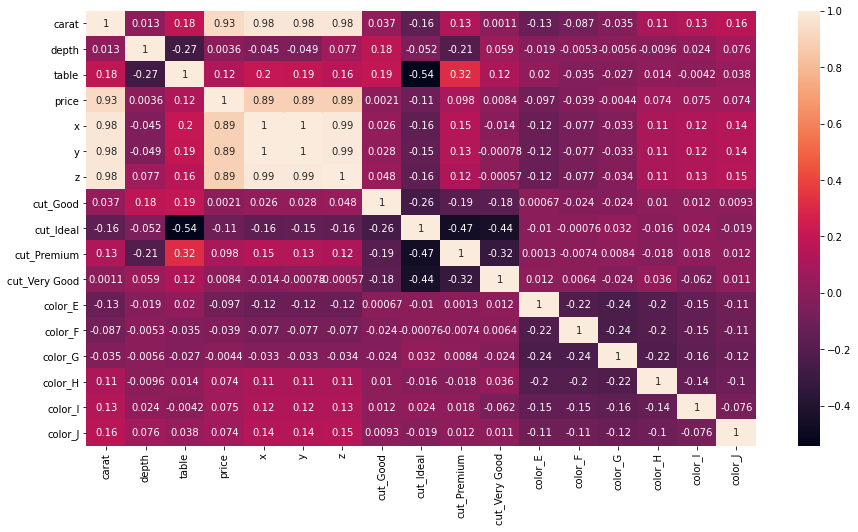

In [32]:
sns.heatmap(data_diamond.corr(),annot=True)
plt.rcParams['figure.figsize']=[15,8]

In [ ]:
#as per my heat map i am clearly say that here has strong co-relattion from price-x,y,z,price-carat.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
x=data_diamond.drop('price',axis=1)
y=data_diamond['price']
x=sm.add_constant(x)
model_diamond=sm.OLS(y,x).fit()
model_diamond.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:18:39   Log-Likelihood:                -13345.
No. Observations:                1547   AIC:                         2.672e+04
Df Residuals:                    1530   BIC:                         2.681e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.066e+04   8378.089     -1.272      0.204   -2.71e+04    5776.269
carat          1.322e+04    371.464     35.601      0.000    1.25e+04     1.4e+04
depth           273.9828    131.712      2.080      0.038      15.627     532.338
table           -30.3427     20.547     -1.477      0.140     -70.646       9.961
x             -1692.0142    899.352     -1.881      0.060   -3456.108      72.080
y              3092.6570   1044.380      2.961      0.003    1044.089    5141.226
z             -5599.5209   2150.582     -2.604      0.009   -9817.921   -1381.121
cut_Good        579.7803    249.044      2.328      0.020      91.277    1068.284
cut_Ideal      1184.3864    249.248      4.752      0.000     695.482    1673.291
cut_Premium     927.6344    237.371      3.908      0.000     462.028    1393.241
cut_Very Good   933.0889    243.198      3.837      0.000     456.051    1410.126
color_E           2.2611    124.611      0.018      0.986    -242.166     246.688
color_F         182.0281    125.368      1.452      0.147     -63.882     427.939
color_G         -40.9346    121.618     -0.337      0.736    -279.490     197.621
color_H        -606.2675    129.269     -4.690      0.000    -859.831    -352.704
color_I       -1016.8542    150.205     -6.770      0.000   -1311.483    -722.225
color_J       -1930.5179    180.045    -10.722      0.000   -2283.678   -1577.357
==============================================================================
Omnibus:                      470.401   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5833.995
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                      12.276   Cond. No.                     2.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
dlr=LinearRegression()
d_fs=sfs(dlr,k_features=8,forward=True,scoring='r2',cv=5,verbose=2)
d_fs.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2021-08-07 02:32:31] Features: 1/8 -- score: 0.8611859711618426[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2021-08-07 02:32:31] Features: 2/8 -- score: 0.8701992571397323[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2021-08-07 02:32:31] Features: 3/8 -- score: 0.8777650727854527[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=8,
                          scoring='r2', verbose=2)

In [41]:
pd.DataFrame(d_fs.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)","[0.8762829949804581, 0.8669378259743176, 0.855...",0.861186,"(carat,)"
2,"(1, 6)","[0.8834118629620207, 0.8802461032547032, 0.868...",0.870199,"(carat, z)"
3,"(1, 6, 16)","[0.8913075810938818, 0.886325436421043, 0.8742...",0.877765,"(carat, z, color_J)"
4,"(1, 6, 15, 16)","[0.8871631778975613, 0.8903240744152804, 0.880...",0.880616,"(carat, z, color_I, color_J)"
5,"(1, 3, 6, 15, 16)","[0.8875842536762167, 0.891817328785208, 0.8856...",0.883232,"(carat, table, z, color_I, color_J)"
6,"(1, 3, 6, 14, 15, 16)","[0.8911045141725181, 0.8907896057845884, 0.889...",0.885831,"(carat, table, z, color_H, color_I, color_J)"
7,"(1, 3, 6, 8, 14, 15, 16)","[0.8911153033743007, 0.8918738122339652, 0.889...",0.886088,"(carat, table, z, cut_Ideal, color_H, color_I,..."
8,"(1, 3, 4, 6, 8, 14, 15, 16)","[0.8921105651697747, 0.8926103827717617, 0.890...",0.886665,"(carat, table, x, z, cut_Ideal, color_H, color..."


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
dlr=LinearRegression()
cvscore=cross_val_score(dlr,x,y,cv=4,scoring='r2')

In [49]:
k=KFold(n_splits=4,shuffle=True,random_state=5)
Cv1=cross_val_score(dlr,x,y,cv=kflod,scoring='r2')

In [50]:
print(cvscore)
print(Cv1)

[0.87701916 0.90466516 0.8953416  0.86677039]
[0.89854273 0.88980734 0.90174939 0.8565487 ]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
x=data_diamond.drop('price',axis=1)
y=data_diamond['price']
x=sm.add_constant(x)
model_d=sm.OLS(y,x).fit()
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        03:25:46   Log-Likelihood:                -13345.
No. Observations:                1547   AIC:                         2.672e+04
Df Residuals:                    1530   BIC:                         2.681e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.066e+04   8378.089     -1.272      0.204   -2.71e+04    5776.269
carat          1.322e+04    371.464     35.601      0.000    1.25e+04     1.4e+04
depth           273.9828    131.712      2.080      0.038      15.627     532.338
table           -30.3427     20.547     -1.477      0.140     -70.646       9.961
x             -1692.0142    899.352     -1.881      0.060   -3456.108      72.080
y              3092.6570   1044.380      2.961      0.003    1044.089    5141.226
z             -5599.5209   2150.582     -2.604      0.009   -9817.921   -1381.121
cut_Good        579.7803    249.044      2.328      0.020      91.277    1068.284
cut_Ideal      1184.3864    249.248      4.752      0.000     695.482    1673.291
cut_Premium     927.6344    237.371      3.908      0.000     462.028    1393.241
cut_Very Good   933.0889    243.198      3.837      0.000     456.051    1410.126
color_E           2.2611    124.611      0.018      0.986    -242.166     246.688
color_F         182.0281    125.368      1.452      0.147     -63.882     427.939
color_G         -40.9346    121.618     -0.337      0.736    -279.490     197.621
color_H        -606.2675    129.269     -4.690      0.000    -859.831    -352.704
color_I       -1016.8542    150.205     -6.770      0.000   -1311.483    -722.225
color_J       -1930.5179    180.045    -10.722      0.000   -2283.678   -1577.357
==============================================================================
Omnibus:                      470.401   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5833.995
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                      12.276   Cond. No.                     2.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#above model we clearly say that color-e is a insignificant

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
model_diamond.resid.skew()

1.0573480306256224

<AxesSubplot:ylabel='Density'>

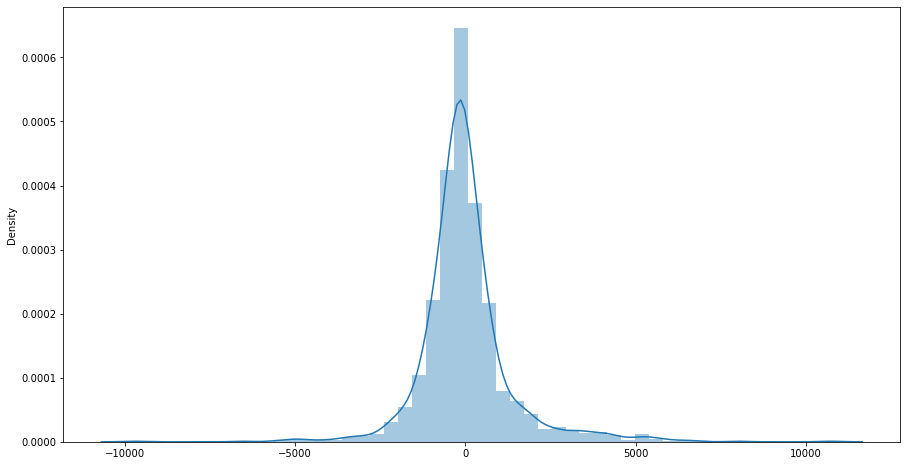

In [64]:
sns.distplot(model_diamond.resid)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
yes its possibale to make the residuals normal.

In [67]:
dimon=np.log(model_diamond.resid)
dimon.skew()

-0.6451248583014396

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
x=data_diamond.drop('price',axis=1)
y=data_diamond['price']
x=sm.add_constant(x)
model_d=sm.OLS(y,x).fit()
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        03:38:51   Log-Likelihood:                -13345.
No. Observations:                1547   AIC:                         2.672e+04
Df Residuals:                    1530   BIC:                         2.681e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.066e+04   8378.089     -1.272      0.204   -2.71e+04    5776.269
carat          1.322e+04    371.464     35.601      0.000    1.25e+04     1.4e+04
depth           273.9828    131.712      2.080      0.038      15.627     532.338
table           -30.3427     20.547     -1.477      0.140     -70.646       9.961
x             -1692.0142    899.352     -1.881      0.060   -3456.108      72.080
y              3092.6570   1044.380      2.961      0.003    1044.089    5141.226
z             -5599.5209   2150.582     -2.604      0.009   -9817.921   -1381.121
cut_Good        579.7803    249.044      2.328      0.020      91.277    1068.284
cut_Ideal      1184.3864    249.248      4.752      0.000     695.482    1673.291
cut_Premium     927.6344    237.371      3.908      0.000     462.028    1393.241
cut_Very Good   933.0889    243.198      3.837      0.000     456.051    1410.126
color_E           2.2611    124.611      0.018      0.986    -242.166     246.688
color_F         182.0281    125.368      1.452      0.147     -63.882     427.939
color_G         -40.9346    121.618     -0.337      0.736    -279.490     197.621
color_H        -606.2675    129.269     -4.690      0.000    -859.831    -352.704
color_I       -1016.8542    150.205     -6.770      0.000   -1311.483    -722.225
color_J       -1930.5179    180.045    -10.722      0.000   -2283.678   -1577.357
==============================================================================
Omnibus:                      470.401   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5833.995
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                      12.276   Cond. No.                     2.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
rfe=RFE(dlr,n_features_to_select=7,verbose=3)
rfe.fit(x,y)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


RFE(estimator=LinearRegression(), n_features_to_select=7, verbose=3)

In [71]:
pd.DataFrame(rfe.ranking_,index=x.columns,columns=['rank']).sort_values(by='rank')

,rank
color_J,1
carat,1
color_H,1
color_I,1
x,1
y,1
z,1
cut_Ideal,2
cut_Very Good,3
cut_Premium,4


In [ ]:
#here is 7 significant variable.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
x=data_diamond[['color']]
x=pd.get_dummies(x,drop_first=True)
y=data_diamond['price']
x=sm.add_constant(x)

In [76]:
lr=LinearRegression()
rfe=RFE(lr,n_features_to_select=3,verbose=3)
rfe.fit(x,y)

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


RFE(estimator=LinearRegression(), n_features_to_select=3, verbose=3)

In [77]:
pd.DataFrame(rfe.ranking_,index=x.columns,columns=['rank']).sort_values(by='rank')

,rank
color_H,1
color_I,1
color_J,1
color_E,2
color_G,3
color_F,4
const,5


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
x=data_diamond.drop('price',axis=1)
y=data_diamond['price']
x=sm.add_constant(x)
model_d=sm.OLS(y,x).fit()

In [81]:
rfe=RFE(lr,n_features_to_select=5,verbose=3)
rfe.fit(x,y)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


RFE(estimator=LinearRegression(), n_features_to_select=5, verbose=3)

In [82]:
pd.DataFrame(rfe.ranking_,index=x.columns,columns=['rank']).sort_values(by='rank')

,rank
color_J,1
carat,1
x,1
y,1
z,1
color_I,2
color_H,3
cut_Ideal,4
cut_Very Good,5
cut_Premium,6
